In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopy.distance
import seaborn as sns

In [2]:
#pip install geopy

In [3]:
pwd

'C:\\Users\\bolbahadir\\Documents\\Yapay Zeka Kursu\\Projects\\BART Project'

In [9]:
ls

 Volume in drive C has no label.
 Volume Serial Number is CC60-5742

 Directory of C:\Users\bolbahadir\Documents\Yapay Zeka Kursu\Projects\BART Project

17.11.2022  00:11    <DIR>          .
17.11.2022  00:11    <DIR>          ..
16.11.2022  22:07    <DIR>          .ipynb_checkpoints
16.11.2022  21:42       350.218.878 archive.zip
17.11.2022  00:11            38.884 BART Project.ipynb
03.01.2021  22:10               482 README.txt
16.11.2022  22:04    <DIR>          ridership
               3 File(s)    350.258.244 bytes
               4 Dir(s)  316.236.316.672 bytes free


In [92]:
df=pd.read_csv('ridership/date-hour-soo-dest-2020.csv')

In [93]:
df.head()

Date  Hour Origin Station Destination Station  Trip Count
0  2020-01-01     0           12TH                16TH           5
1  2020-01-01     0           12TH                24TH           3
2  2020-01-01     0           12TH                ASHB           6
3  2020-01-01     0           12TH                BAYF           1
4  2020-01-01     0           12TH                CIVC           3

In [94]:
df.shape

(5811863, 5)

In [95]:
df['date']=pd.to_datetime(df['Date'])
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['Month']=df['date'].dt.month_name(locale = 'English')
df['Day']=df['date'].dt.day_name(locale = 'English')

In [96]:
del df['Date']

In [97]:
del df['date']

In [98]:
df.head()

Hour Origin Station Destination Station  Trip Count  year  month  day  \
0     0           12TH                16TH           5  2020      1    1   
1     0           12TH                24TH           3  2020      1    1   
2     0           12TH                ASHB           6  2020      1    1   
3     0           12TH                BAYF           1  2020      1    1   
4     0           12TH                CIVC           3  2020      1    1   

     Month        Day  
0  January  Wednesday  
1  January  Wednesday  
2  January  Wednesday  
3  January  Wednesday  
4  January  Wednesday

In [99]:
df.groupby('Hour')['Trip Count'].sum()

Hour
0      126305
1       35353
2        7468
3        2618
4        3427
5      385888
6     1325172
7     2431667
8     3214482
9     2460771
10    1480219
11    1182663
12    1181338
13    1250083
14    1455191
15    1838814
16    2572645
17    3524778
18    2917639
19    1625245
20     994815
21     692436
22     450471
23     266791
Name: Trip Count, dtype: int64

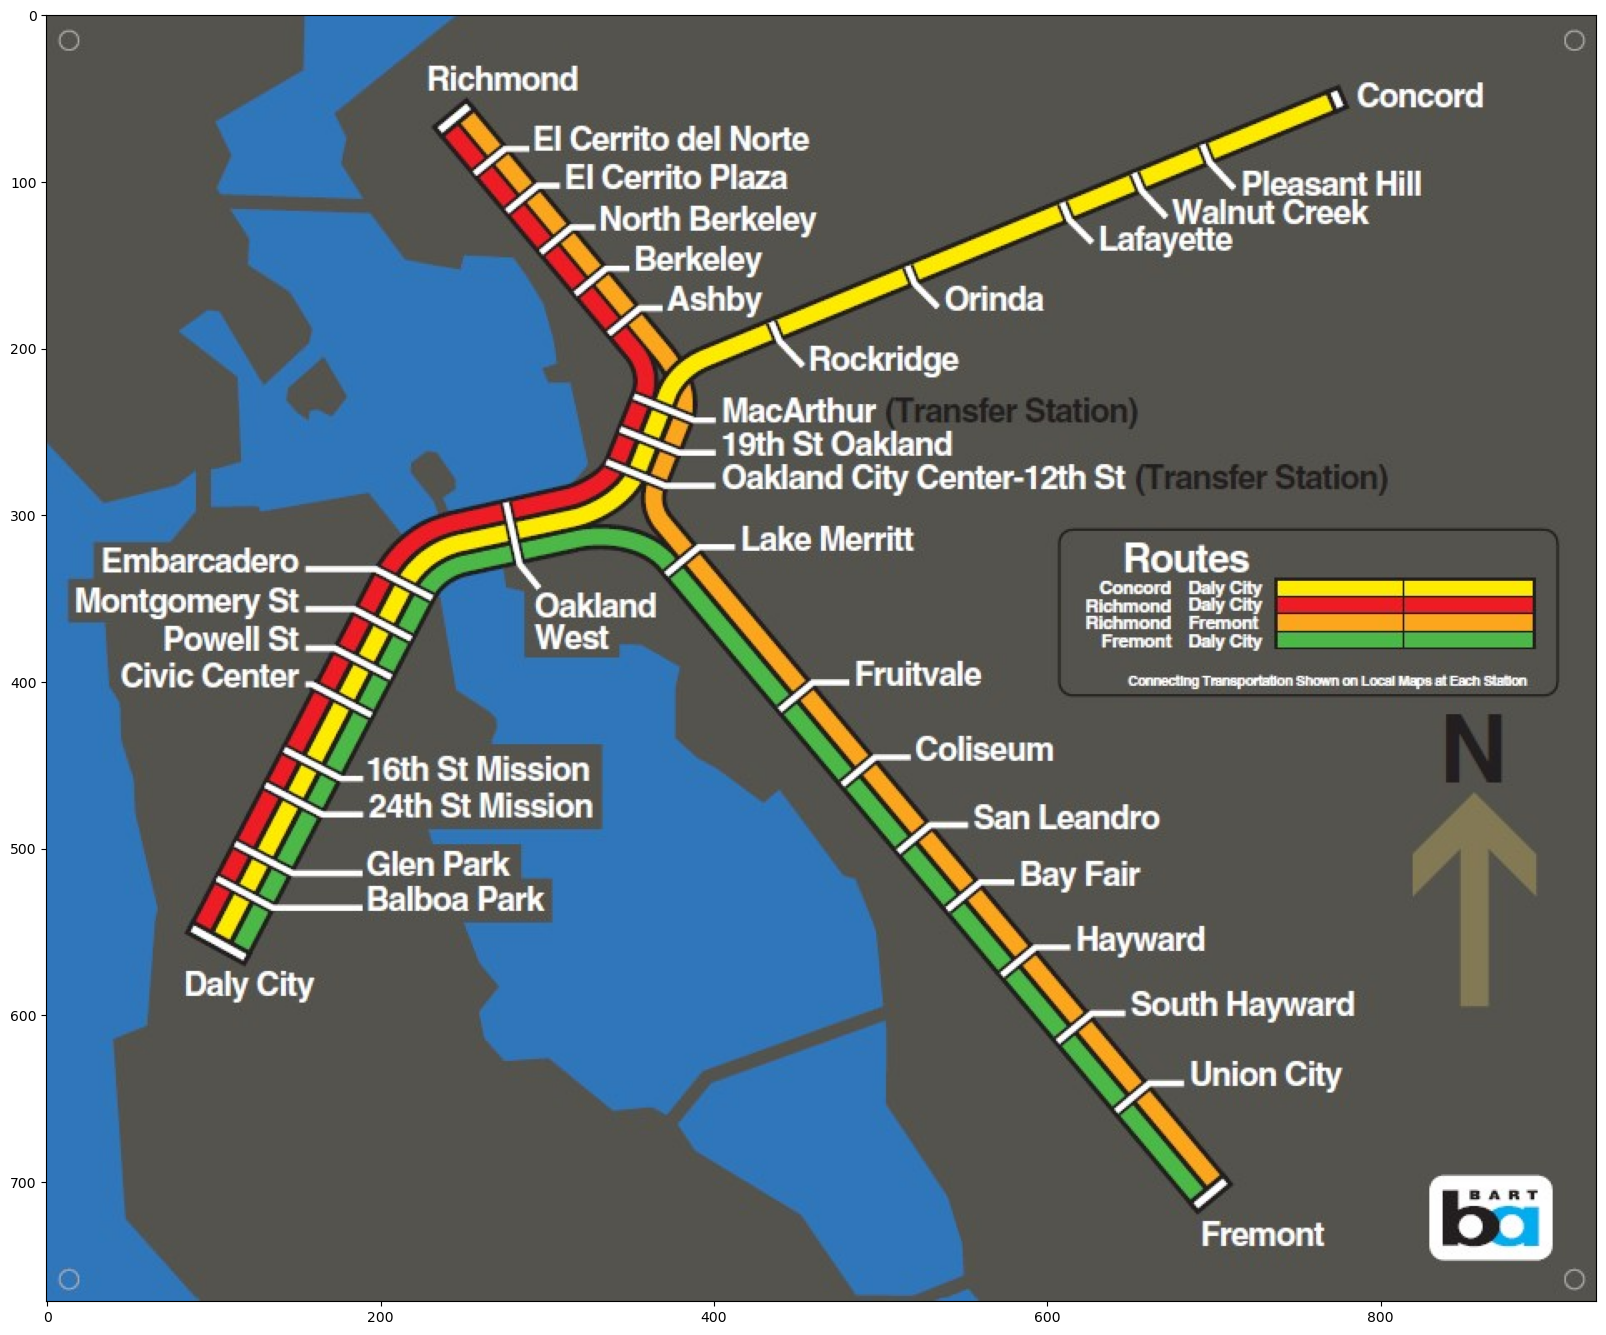

In [38]:
plt.figure(figsize=(20,20))
img=plt.imread('maps4.jpg')
plt.imshow(img)
plt.show()

C:\Users\bolbahadir\Anaconda3\envs\env_full2\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


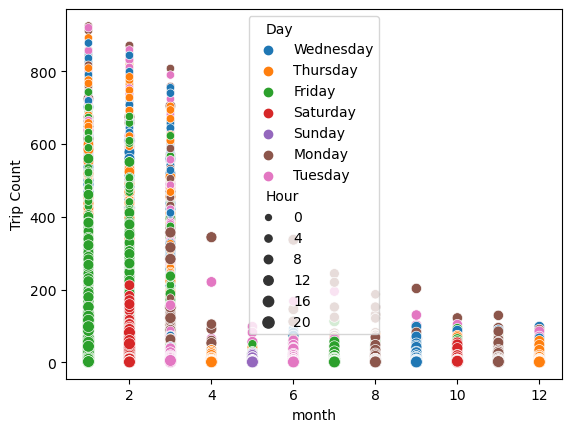

In [77]:
g = sns.scatterplot(data=df, x='month', y=df['Trip Count'],hue="Day",size='Hour')

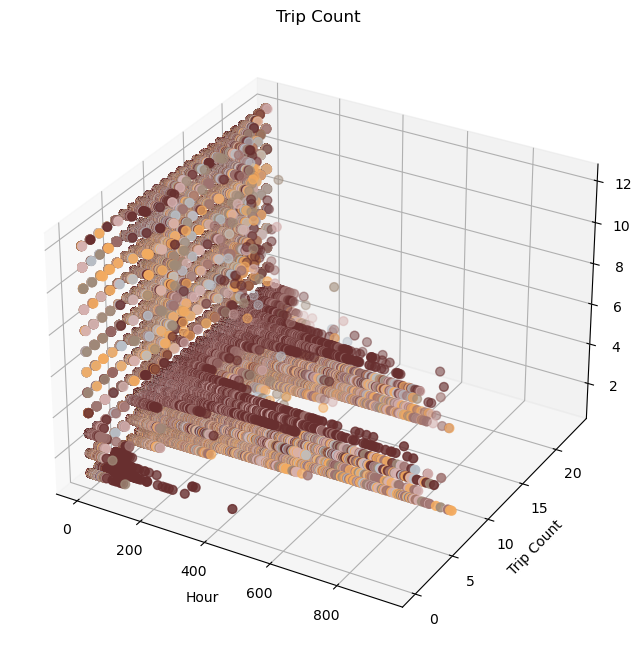

In [78]:
from matplotlib import colors
fig = plt.figure(figsize=(10,8))
cmap = colors.ListedColormap(["#682F2F", "#9E726F", "#D6B2B1", "#B9C0C9", "#9F8A78", "#F3AB60"])
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(df['Trip Count'],df.Hour,df.month, s=40,c=df.day, marker='o', cmap = cmap )
ax.set_title("Trip Count")
plt.xlabel('Hour')
plt.ylabel('Trip Count')

plt.show()

#### Which BART station is the busiest?
#### What is the least popular BART route?

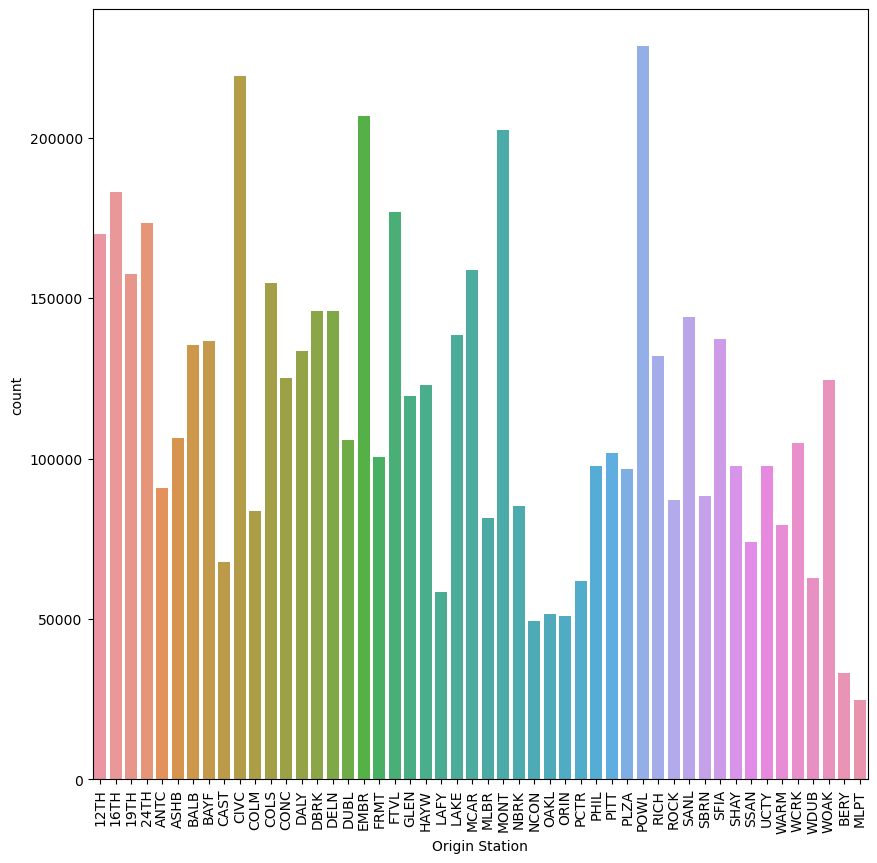

In [166]:
fig=plt.figure(figsize=(10,10))
plt.xticks(rotation=90)
r=sns.countplot(data=df,x='Origin Station')


### When is the best time to go to SF from Berkeley if you want to find a seat?
### Which day of the week is the busiest?

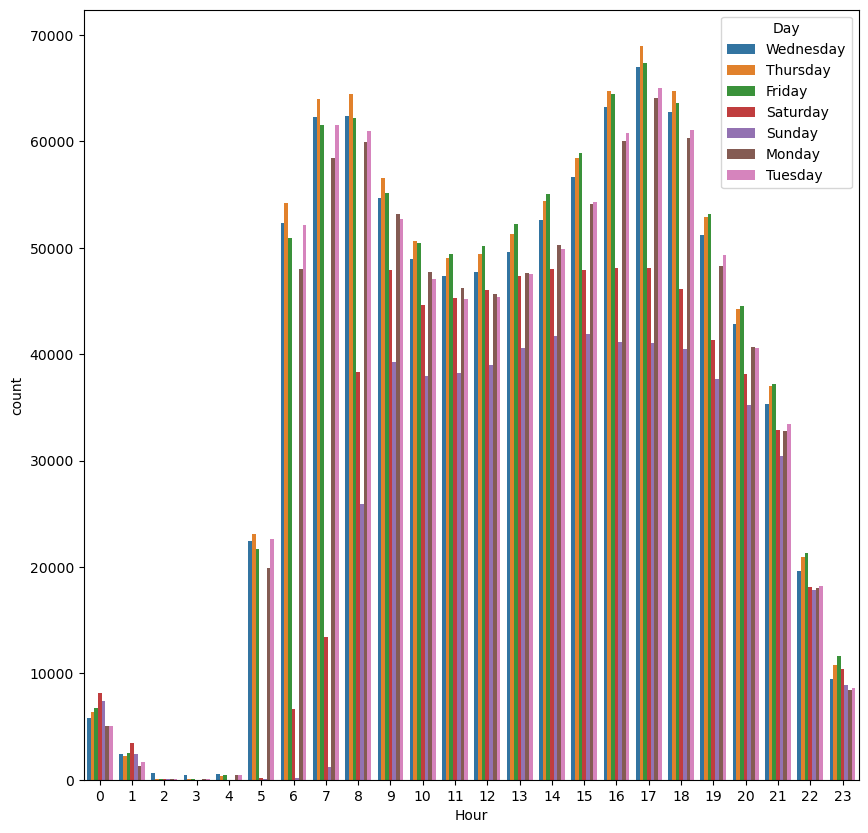

In [73]:
fig=plt.figure(figsize=(10,10))
r=sns.countplot(data=df,x='Hour',hue='Day')

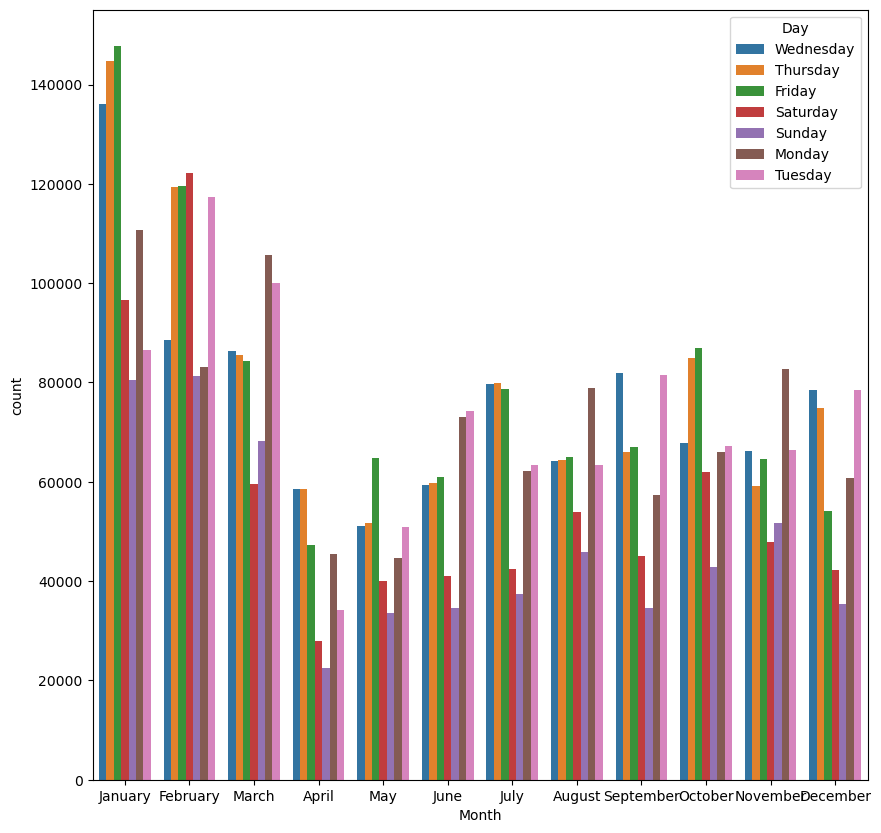

In [74]:
fig=plt.figure(figsize=(10,10))
r=sns.countplot(data=df,x='Month',hue='Day')

### Busiest Season

In [167]:
bins=[0,3,6,9,11]
bins_date=pd.cut(df['month'],bins,include_lowest=True,labels=['winter','spring','summer','fall'])
bins_date=bins_date.cat.as_unordered()

<AxesSubplot:>

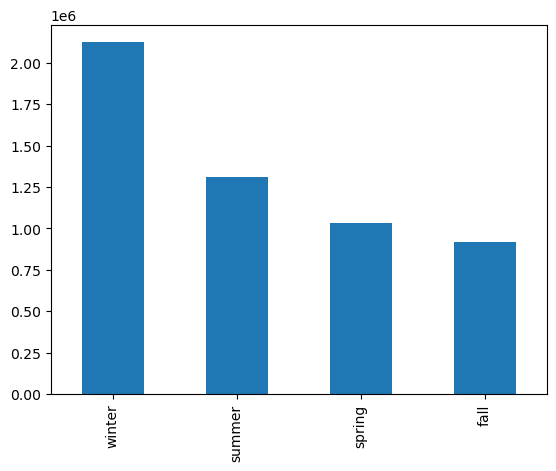

In [169]:
bins_date.value_counts().plot(kind='bar')

In [170]:

bins=[0,6,13,20,271]
bins_date=pd.cut(df['day'],bins,include_lowest=True,labels=['1stWeek','2ndWeek','3rdWeek','4thWeek'])
bins_date=bins_date.cat.as_unordered()

### Which day of the week is the busiest?

<AxesSubplot:>

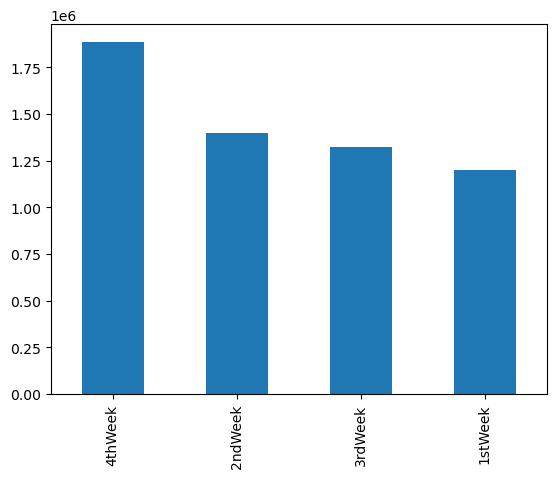

In [171]:
bins_date.value_counts().plot(kind='bar')

In [86]:
df1=pd.read_csv('BART Coordinates.csv',index_col=['Unnamed: 0'])

In [114]:
df1.columns=["Origin Station","o_latitute","o_longitude"]

In [120]:
df3=df1.copy()

In [121]:
df3.columns=["Destination Station","d_latitute","d_longitude"]

In [115]:
df1.head()

Origin Station  o_latitute  o_longitude
0           12TH         798          702
1           19TH         798          655
2           MCAR         802          607
3           16TH         375          948
4           CIVC         397          915

In [117]:
df2=pd.merge(df,df1)

In [118]:
df2.head()

Hour Origin Station Destination Station  Trip Count  year  month  day  \
0     0           12TH                16TH           5  2020      1    1   
1     0           12TH                24TH           3  2020      1    1   
2     0           12TH                ASHB           6  2020      1    1   
3     0           12TH                BAYF           1  2020      1    1   
4     0           12TH                CIVC           3  2020      1    1   

     Month        Day  o_latitute  o_longitude  
0  January  Wednesday         798          702  
1  January  Wednesday         798          702  
2  January  Wednesday         798          702  
3  January  Wednesday         798          702  
4  January  Wednesday         798          702

In [124]:
df_LL=pd.merge(df2,df3)

### https://www.section.io/engineering-education/using-geopy-to-calculate-the-distance-between-two-points/  

### https://www.youtube.com/watch?v=HaGj0DjX8W8 

### https://github.com/enes-asan/BART-Project/blob/main/BART%20Project.ipynb

### Mesafe Hesabı için yukarıdaki linklerden yardım alındı.

### Mesafeler doğrulayamadım. Haritadan bakmam lazım 

In [125]:
df_LL

Hour Origin Station Destination Station  Trip Count  year  month  \
0           0           12TH                16TH           5  2020      1   
1           2           12TH                16TH           4  2020      1   
2          10           12TH                16TH           2  2020      1   
3          11           12TH                16TH          13  2020      1   
4          12           12TH                16TH          10  2020      1   
...       ...            ...                 ...         ...   ...    ...   
5811858    17           MLPT                MLPT           1  2020     12   
5811859     4           MLPT                MLPT           1  2020     12   
5811860     6           MLPT                MLPT           1  2020     12   
5811861     7           MLPT                MLPT           2  2020     12   
5811862    15           MLPT                MLPT           1  2020     12   

         day     Month        Day  o_latitute  o_longitude  d_latitute  \
0          1   January  Wednesday         798          702         375   
1          1   January  Wednesday         798          702         375   
2          1   January  Wednesday         798          702         375   
3          1   January  Wednesday         798          702         375   
4          1   January  Wednesday         798          702         375   
...      ...       ...        ...         ...          ...         ...   
5811858   30  December  Wednesday        1525         1765        1525   
5811859   31  December   Thursday        1525         1765        1525   
5811860   31  December   Thursday        1525         1765        1525   
5811861   31  December   Thursday        1525         1765        1525   
5811862   31  December   Thursday        1525         1765        1525   

         d_longitude  
0                948  
1                948  
2                948  
3                948  
4                948  
...              ...  
5811858         1765  
5811859         1765  
5811860         1765  
5811861         1765  
5811862         1765  

[5811863 rows x 13 columns]

In [127]:
from math import radians, cos, sin, asin, sqrt

In [126]:
df_LL['D_Lat']=df_LL['o_latitute']-df_LL['d_latitute']
df_LL['D_Lon']=df_LL['o_longitude']-df_LL['d_longitude']

In [154]:
df_LL

Hour Origin Station Destination Station  Trip Count  year  month  \
0           0           12TH                16TH           5  2020      1   
1           2           12TH                16TH           4  2020      1   
2          10           12TH                16TH           2  2020      1   
3          11           12TH                16TH          13  2020      1   
4          12           12TH                16TH          10  2020      1   
...       ...            ...                 ...         ...   ...    ...   
5811858    17           MLPT                MLPT           1  2020     12   
5811859     4           MLPT                MLPT           1  2020     12   
5811860     6           MLPT                MLPT           1  2020     12   
5811861     7           MLPT                MLPT           2  2020     12   
5811862    15           MLPT                MLPT           1  2020     12   

         day     Month        Day  o_latitute  o_longitude  d_latitute  \
0          1   January  Wednesday         798          702         375   
1          1   January  Wednesday         798          702         375   
2          1   January  Wednesday         798          702         375   
3          1   January  Wednesday         798          702         375   
4          1   January  Wednesday         798          702         375   
...      ...       ...        ...         ...          ...         ...   
5811858   30  December  Wednesday        1525         1765        1525   
5811859   31  December   Thursday        1525         1765        1525   
5811860   31  December   Thursday        1525         1765        1525   
5811861   31  December   Thursday        1525         1765        1525   
5811862   31  December   Thursday        1525         1765        1525   

         d_longitude  D_Lat  D_Lon  
0                948    423   -246  
1                948    423   -246  
2                948    423   -246  
3                948    423   -246  
4                948    423   -246  
...              ...    ...    ...  
5811858         1765      0      0  
5811859         1765      0      0  
5811860         1765      0      0  
5811861         1765      0      0  
5811862         1765      0      0  

[5811863 rows x 15 columns]

In [159]:

la_o=df_LL['o_latitute']
la_d=df_LL['d_latitute']
lo_o=df_LL['o_longitude']
lo_d=df_LL['d_longitude']
d_lat=la_o-la_d
d_lot=lo_o-lo_d
q=np.sin(d_lat/2)**2+np.cos(la_o)*np.cos(la_d)*np.sin(d_lot/2)**2
Q=2 * np.arctan2(np.sqrt(q), np.sqrt(1 - q))
R_km=6371
distance=Q*R_km
df_LL['Distance']=distance

In [157]:
lat1=df_LL["o_latitute"]
lon1=df_LL["o_longitude"]
lat2=df_LL["d_latitute"]
lon2=df_LL["d_longitude"]

dlon=(lon2-lon1).astype(float)
dlat=(lat2-lat1).astype(float)
R = 6373.0
a=np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
distance = R * c
df_LL["distance"]=distance

In [160]:
df_LL

Hour Origin Station Destination Station  Trip Count  year  month  \
0           0           12TH                16TH           5  2020      1   
1           2           12TH                16TH           4  2020      1   
2          10           12TH                16TH           2  2020      1   
3          11           12TH                16TH          13  2020      1   
4          12           12TH                16TH          10  2020      1   
...       ...            ...                 ...         ...   ...    ...   
5811858    17           MLPT                MLPT           1  2020     12   
5811859     4           MLPT                MLPT           1  2020     12   
5811860     6           MLPT                MLPT           1  2020     12   
5811861     7           MLPT                MLPT           2  2020     12   
5811862    15           MLPT                MLPT           1  2020     12   

         day     Month        Day  o_latitute  o_longitude  d_latitute  \
0          1   January  Wednesday         798          702         375   
1          1   January  Wednesday         798          702         375   
2          1   January  Wednesday         798          702         375   
3          1   January  Wednesday         798          702         375   
4          1   January  Wednesday         798          702         375   
...      ...       ...        ...         ...          ...         ...   
5811858   30  December  Wednesday        1525         1765        1525   
5811859   31  December   Thursday        1525         1765        1525   
5811860   31  December   Thursday        1525         1765        1525   
5811861   31  December   Thursday        1525         1765        1525   
5811862   31  December   Thursday        1525         1765        1525   

         d_longitude  D_Lat  D_Lon      distance      Distance  
0                948    423   -246  11737.551948  11733.868423  
1                948    423   -246  11737.551948  11733.868423  
2                948    423   -246  11737.551948  11733.868423  
3                948    423   -246  11737.551948  11733.868423  
4                948    423   -246  11737.551948  11733.868423  
...              ...    ...    ...           ...           ...  
5811858         1765      0      0      0.000000      0.000000  
5811859         1765      0      0      0.000000      0.000000  
5811860         1765      0      0      0.000000      0.000000  
5811861         1765      0      0      0.000000      0.000000  
5811862         1765      0      0      0.000000      0.000000  

[5811863 rows x 17 columns]

In [140]:
def distance_d(LaA, LaB, LoA, LoB):
# The function "radians" is found in the math module, It's also used to convert radians to degrees.  
    LoA = radians(LoA)  
    LoB = radians(LoB)  
    LaA= radians(LaA)  
    LaB = radians(LaB) 
# The "Haversine formula" is used.
    D_Lo = LoB - LoA 
    D_La = LaB - LaA 
    P = sin(D_La / 2)**2 + cos(LaA) * cos(LaB) * sin(D_Lo / 2)**2  
   
    Q = 2 * asin(sqrt(P))   
    # The earth's radius in kilometers.
    R_km = 6371  
# Then we'll compute the outcome.
    return(Q * R_km)

In [142]:
distance_d(df_LL.o_latitute[1],df_LL.d_latitute[1],df_LL.o_longitude[1],df_LL.d_longitude[1])

8909.621742131874

In [143]:
def distance_d(LaA, LaB, LoA, LoB):
# The function "radians" is found in the math module, It's also used to convert radians to degrees.  
    LoA = LoA  
    LoB = LoB
    LaA= LaA  
    LaB = LaB 
# The "Haversine formula" is used.
    D_Lo = LoB - LoA 
    D_La = LaB - LaA 
    P = sin(D_La / 2)**2 + cos(LaA) * cos(LaB) * sin(D_Lo / 2)**2  
   
    Q = 2 * asin(sqrt(P))   
    # The earth's radius in kilometers.
    R_km = 6371  
# Then we'll compute the outcome.
    return(Q * R_km)

In [144]:
distance_d(df_LL.o_latitute[1],df_LL.d_latitute[1],df_LL.o_longitude[1],df_LL.d_longitude[1])

11733.868423189964

### Mesafe Doğrulandı. Metre cinsinden doğru çıkıyor. Treni seçince mesafeyi göstermiyor. Araba olarak seçmek gerekiyor.

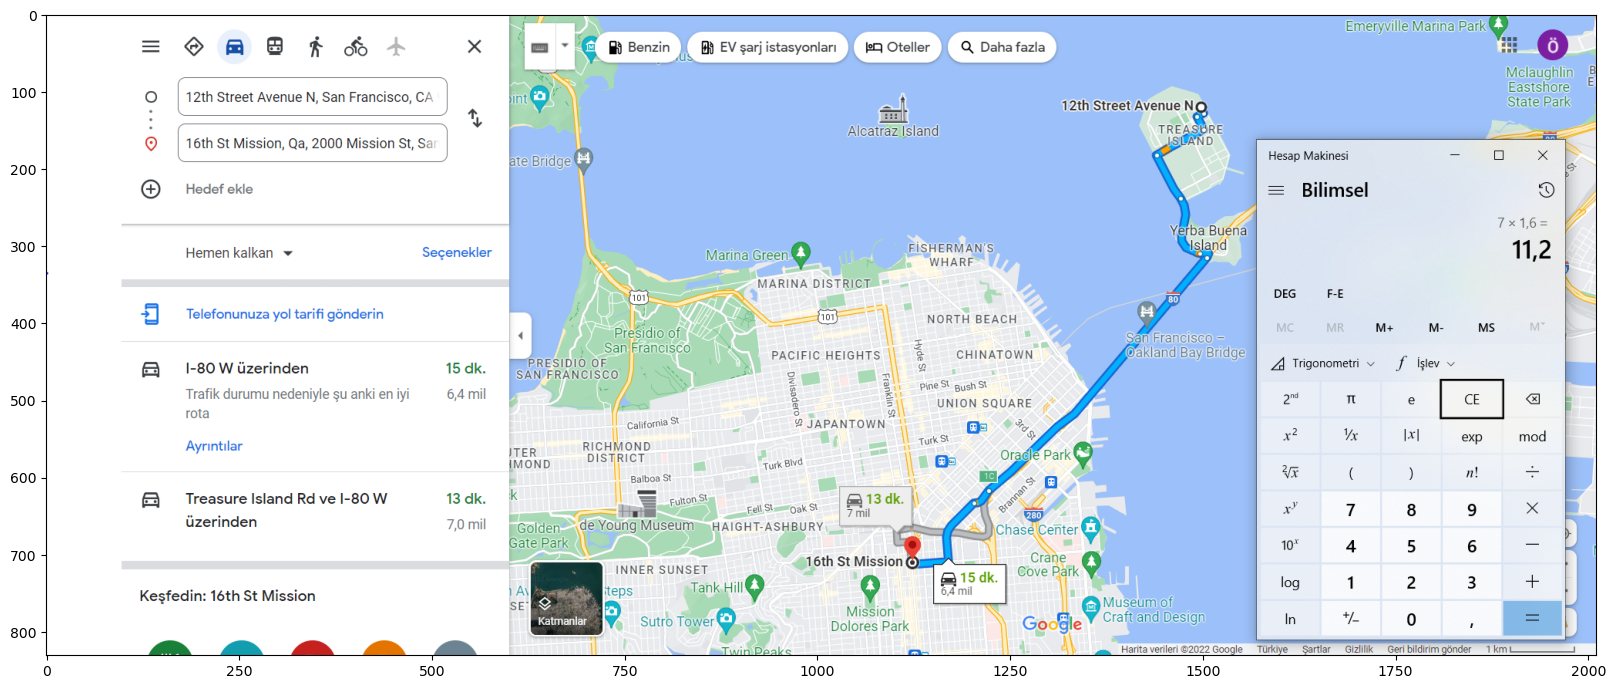

In [172]:
plt.figure(figsize=(20,20))
img=plt.imread('12th-16th Distance- Correction.PNG')
plt.imshow(img)
plt.show()

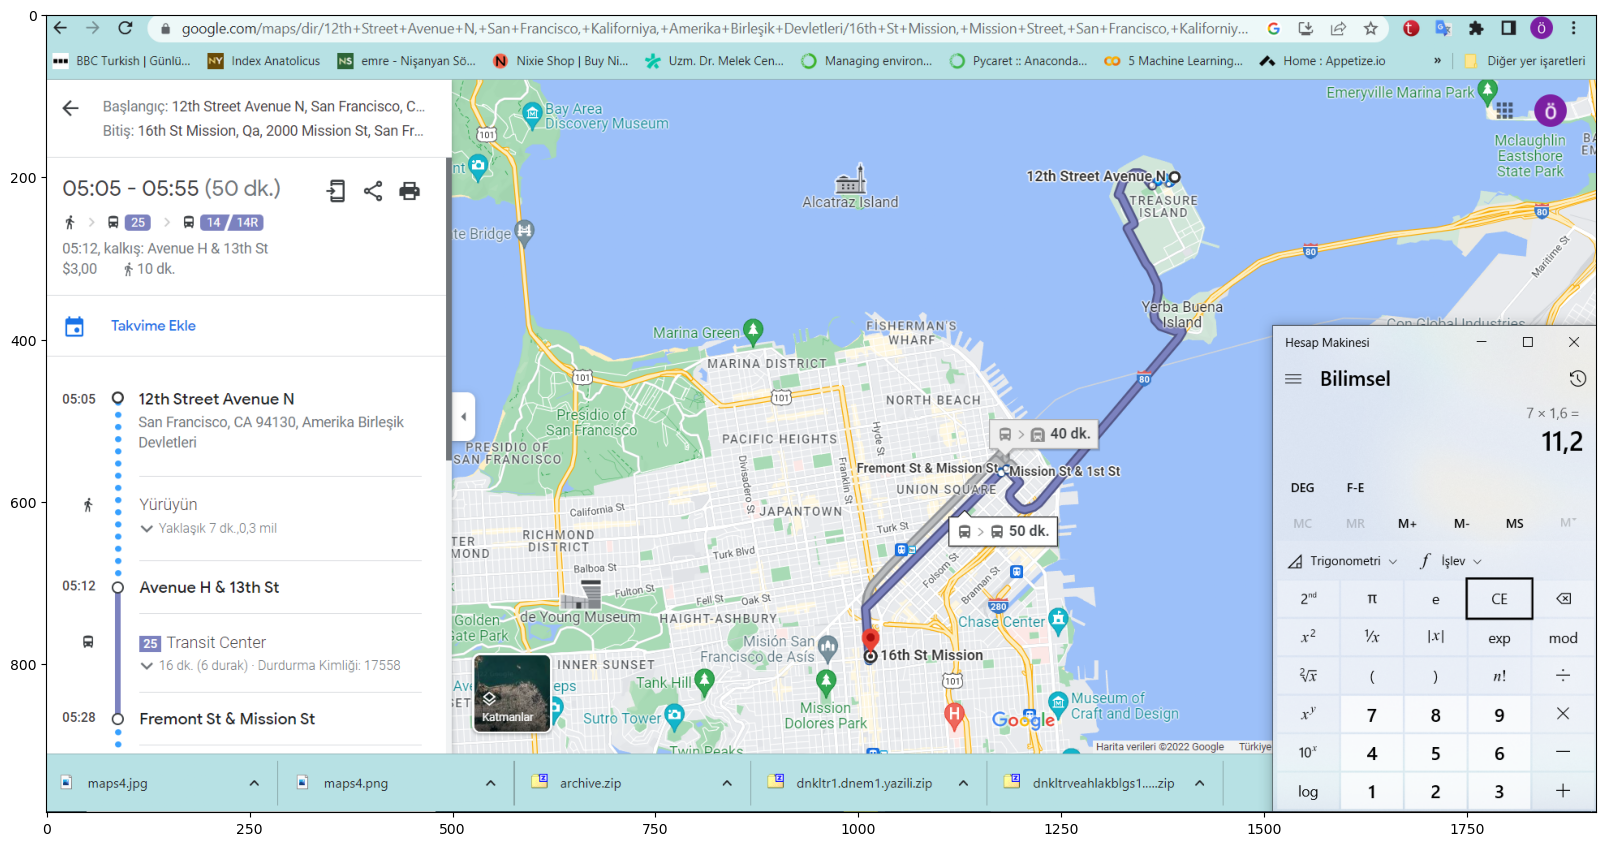

In [173]:
plt.figure(figsize=(20,20))
img=plt.imread('12th-16th Distance- Correction Subway.PNG')
plt.imshow(img)
plt.show()

### Doğrulama amaçlı başka bir paketle distance hesaplıyacağım

In [186]:
from geopy.distance import geodesic as GRC
S12TH=np.arctan2(798 , 702)
S16TH=np.arctan2(375 ,948)
# Finally print the distance between the two points in km
print("The distance between S12TH and S16TH is:", GRC(S12TH,S16TH).km) 

ValueError: A single number has been passed to the Point constructor. This is probably a mistake, because constructing a Point with just a latitude seems senseless. If this is exactly what was meant, then pass the zero longitude explicitly to get rid of this error.

In [181]:
pip install haversine

Note: you may need to restart the kernel to use updated packages.


In [184]:

import haversine as hs


coord_1 = (np.radians(798), np.radians(702))
coord_2 = (np.radians(375), np.radians(948))
x = hs.haversine(coord_1,coord_2)
print(f'The distance is {x} km')

The distance is 945.6784399351671 km
